# GRIP: THE SPARKS FOUNDATION

# Data Science and Business Analytics Internship

# Task1: Prediction Using Supervised ML

## Submitted by Mayur Asnani

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# data generation

df=pd.read_csv('/Users/mayurasnani/Desktop/sparks foundation/spark_data.csv')

In [3]:
df.head(n=10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# converting into numpy array

data=df.values

X=data[:,0]
Y=data[:,1]


In [5]:
X,Y

(array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]),
 array([21., 47., 27., 75., 30., 20., 88., 60., 81., 25., 85., 62., 41.,
        42., 17., 95., 30., 24., 67., 69., 30., 54., 35., 76., 86.]))

In [6]:
# we normalise our data
u=X.mean()
std=X.std()
X=(X-u)/std

In [7]:
X=X.reshape((25,1))
Y=Y.reshape((25,1))
print(X.shape,Y.shape)

(25, 1) (25, 1)


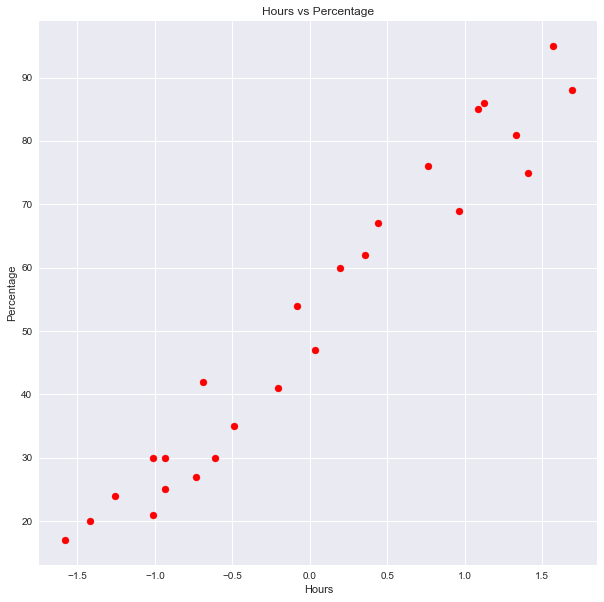

In [8]:
# visualising our data

plt.style.use('seaborn')
plt.figure(figsize=(10,10))
plt.scatter(X,Y,color='red')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.title('Hours vs Percentage')
plt.show()

In [9]:
# we split our data into training and testing

xtain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

In [10]:
print(xtain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(20, 1) (20, 1)
(5, 1) (5, 1)


In [11]:
# in order to predict the percentage of student based on study hours, we want a best fit line for the above data

In [12]:
# implementing Linear regression

def hypothesis(X,theta):
    y_=theta[0]+theta[1]*X
    return y_

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m): # iterate over all examples
        x=X[i]
        y_=hypothesis(x,theta)
        y=Y[i]
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*x
        
    return grad/m

def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        y_=hypothesis(X[i],theta)
        
        total_error+=(y_-Y[i])**2
        
    return total_error/m



def gradientDescent(X,Y,max_steps=100,lr=0.1):
    theta=np.zeros((2,))
    theta_list=[]
    error_list=[]
    
    for i in range(max_steps):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        
        # upgrade theta
        theta[0]=theta[0]-lr*grad[0]
        theta[1]=theta[1]-lr*grad[1]
        
        theta_list.append((theta[0],theta[1]))
        
    return theta,theta_list,error_list



In [13]:
theta,theta_list,error_list=gradientDescent(xtain,ytrain)

In [14]:
theta

array([51.35193757, 23.95341408])

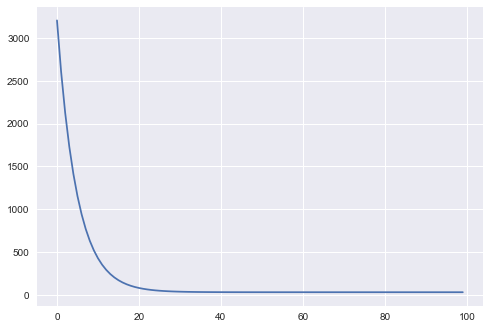

In [15]:
# plotting error

plt.plot(error_list)
plt.show()

# error is reducing

In [16]:
# predictions

y_=hypothesis(xtain,theta)
print(y_)

[[28.96771191]
 [34.77676701]
 [52.20393232]
 [39.61764626]
 [17.3496017 ]
 [33.80859116]
 [46.39487722]
 [88.99461465]
 [85.12191125]
 [36.71311871]
 [28.96771191]
 [21.2223051 ]
 [49.29940477]
 [61.88569083]
 [78.34468029]
 [56.07663573]
 [77.37650444]
 [13.4768983 ]
 [74.47197689]
 [91.8991422 ]]


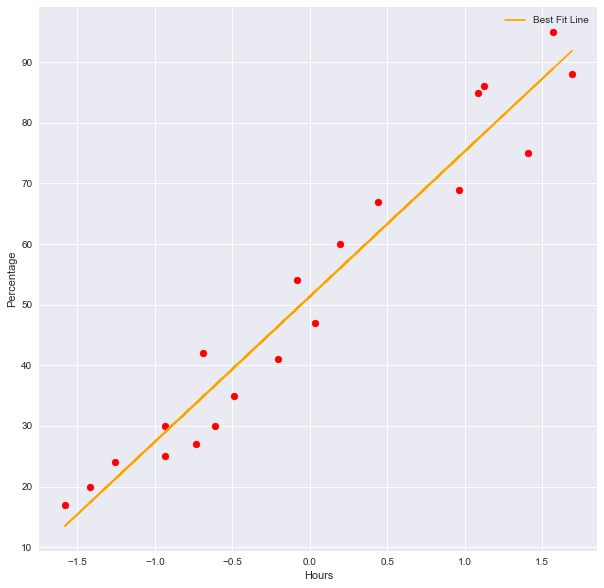

In [17]:
# plotting the best fit line

plt.figure(figsize=(10,10))
plt.scatter(xtain,ytrain,color='red')
plt.plot(xtain,y_,color='orange',label='Best Fit Line')
plt.legend()
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

[[ 5.085       2.34268395]
 [ 9.66642384  4.45638886]
 [13.79414787  6.36348186]
 [17.51310781  8.08414666]
 [20.86378824  9.63659652]
 [23.88266356 11.03726651]
 [26.60259526 12.30098699]
 [29.05318988 13.44114015]
 [31.2611214  14.46980137]
 [33.2504218  15.39786674]
 [35.04274277 16.23516812]
 [36.65759147 16.99057706]
 [38.11254302 17.67209848]
 [39.42343183 18.28695534]
 [40.60452406 18.8416649 ]
 [41.66867296 19.34210771]
 [42.62745879 19.79358968]
 [43.49131496 20.20089827]
 [44.26964159 20.56835308]
 [44.97090788 20.89985156]
 [45.60274427 21.19891024]
 [46.17202559 21.46870192]
 [46.68494582 21.71208926]
 [47.14708558 21.93165508]
 [47.56347285 22.12972969]
 [47.9386377  22.30841558]
 [48.27666162 22.46960965]
 [48.58122195 22.61502332]
 [48.85563188 22.74620068]
 [49.10287652 22.86453478]
 [49.32564541 22.97128245]
 [49.52636178 23.06757759]
 [49.7072089  23.15444318]
 [49.87015388 23.23280215]
 [50.01696906 23.30348714]
 [50.14925129 23.36724933]
 [50.2684393  23.4247664 ]
 

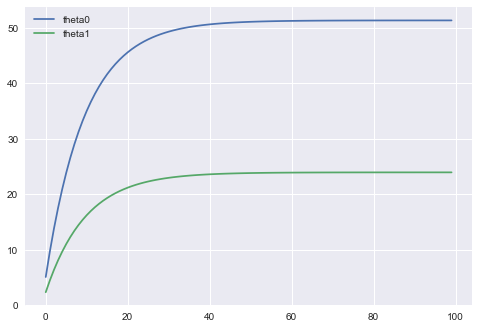

In [18]:
# plotting theta list

theta_list=np.array(theta_list)
print(theta_list)

plt.plot(theta_list[:,0],label='theta0')
plt.plot(theta_list[:,1],label='theta1')
plt.legend()
plt.show()

In [19]:
# calculating R2 score- accuracy

def r2_score(y,y_):
    # numerator
    num=np.sum((y-y_)**2)
    # denomenator
    denom=np.sum((y-y.mean())**2)
    # score
    score=1-num/denom
    return score*100

In [20]:
r2_score(ytrain,y_) # 95% accurate

94.91209328949064

In [21]:
y_pred=hypothesis(xtest,theta)
print(y_pred)

[[83.18555954]
 [27.03136021]
 [27.03136021]
 [69.63109764]
 [59.94933913]]


In [22]:
df=pd.DataFrame(ytest,columns=['Actual'])
df['Predicted']=y_pred

In [23]:
df

,Actual,Predicted
0,81.0,83.185560
1,30.0,27.031360
2,21.0,27.031360
3,76.0,69.631098
4,62.0,59.949339


In [24]:
# training our own data

hour=float(input('enter number of hours per day? '))

print('No of hours : ',hour,'hrs/day')

# normalising hour

hour=(hour-u)/std

y_=hypothesis(hour,theta)

print('Predicted Percentage : %.2f'%y_)

enter number of hours per day? 9.25
No of hours :  9.25 hrs/day
Predicted Percentage : 92.38


# conclusion- The predicted score of the student is 92.4 if the student studies for 9.25 hrs/day